In [15]:
library(readxl)
library(dplyr)
customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

install.packages('ggplot')

Warning message:
"package 'ggplot' is not available (for R version 3.6.1)"

In [16]:
my_first_cook <- order_info_r %>% 
mutate(reserv_month = substr(reserv_no, 1, 6)) %>% 
group_by(item_id, reserv_month) %>% 
summarise(avg_sales = mean(sales)) %>% 
arrange(item_id, reserv_month)

my_first_cook

item_id,reserv_month,avg_sales
M0001,201906,48000.00
M0001,201907,68000.00
M0001,201908,56000.00
M0001,201909,66000.00
M0001,201910,92000.00
M0001,201911,68307.69
M0001,201912,153142.86
M0002,201906,24000.00
M0002,201907,38000.00
M0002,201908,21600.00


In [21]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

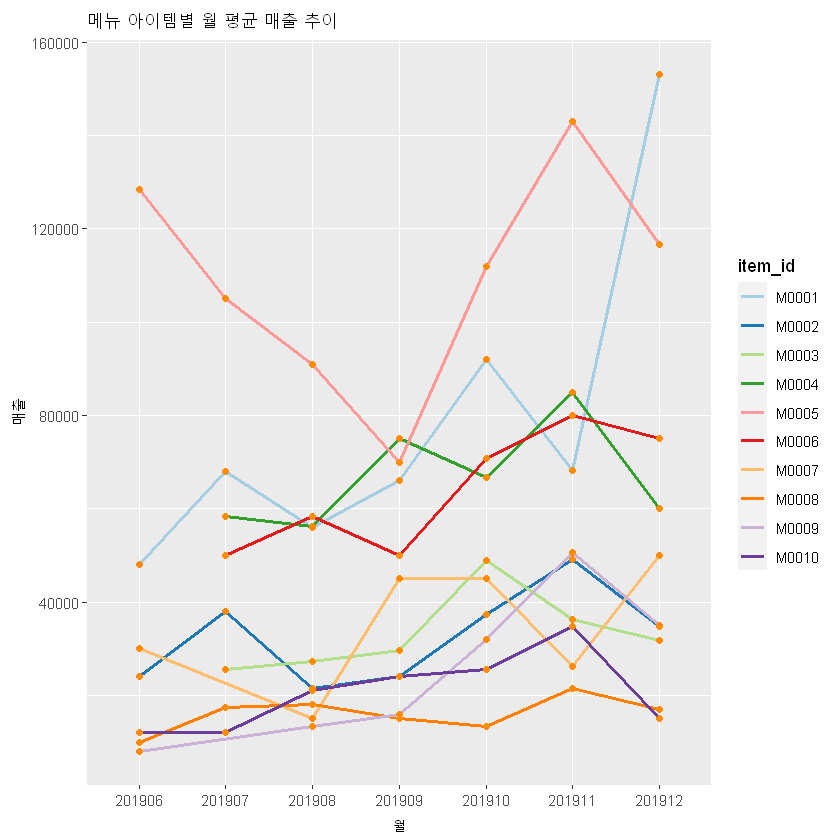

In [22]:
ggplot(my_first_cook, aes(x = reserv_month, y = avg_sales, group = item_id, color = item_id)) +
    geom_line(size = 1) +
    geom_point(color = "darkorange", size = 1.5) +
    scale_color_brewer(palette = "Paired") +
    labs(title = "메뉴 아이템별 월 평균 매출 추이", x = "월", y = "매출")

In [23]:
weight <- c(74, 66, 61, 59, 70) #학생 A 집단의 몸무게

In [24]:
mean(weight) #평균값

[1] 66

[1] 66.00351

In [26]:
median(weight) # 중앙값(74,70,66,61,59) 의 정중앙값.

[1] 66

In [27]:
var(weight) #분산

[1] 38.5

In [28]:
sd(weight) #표준편차

[1] 6.204837

In [30]:
weight <- rnorm(n = 100000, mean = 66, sd = 5)

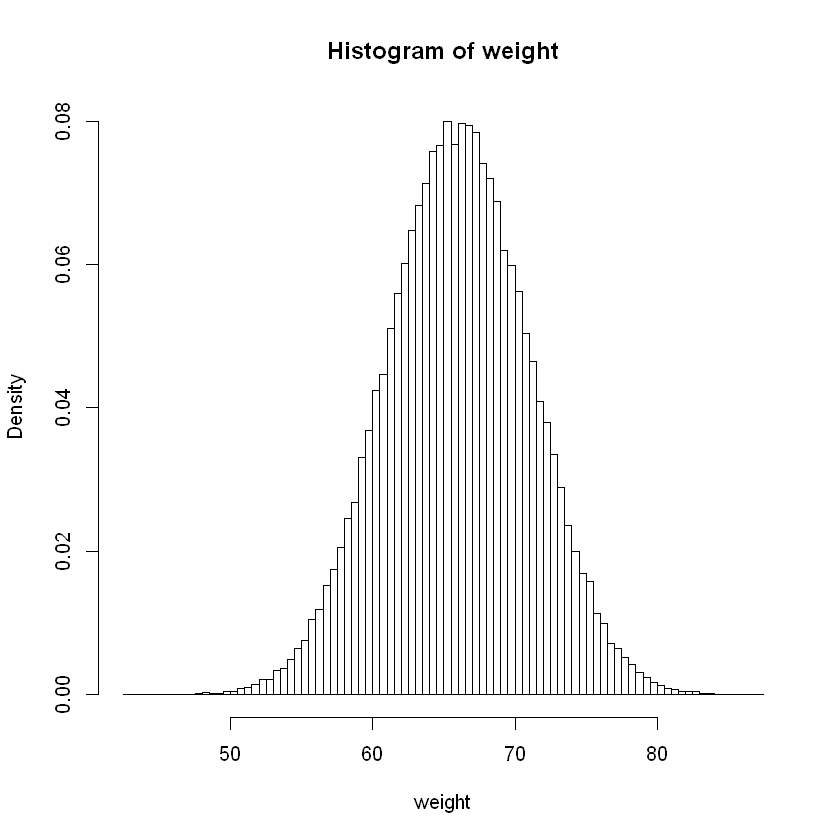

In [34]:
hist(weight, breaks = 100, freq = FALSE)

In [36]:
lines(density(weight))

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


In [37]:
library(dplyr)
library(ggplot2)

In [38]:
table(reservation_r$branch)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    49     18     12     22     15      8     14     10     10      6     20 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    21     22     20     22     13      4     17     10     17     19     10 
  종로   중구   중랑 
    13     18      6 

In [39]:
no_cancel_data <- reservation_r %>% filter(cancel == 'N')

In [40]:
table(no_cancel_data$branch)


  강남   강동   강북   강서   관악   광진   구로   금천   노원   도봉 동대문 
    41     17     12     19     15      8     11      7      8      5     14 
  동작   마포 서대문   서초   성동   성북   송파   양천 영등포   용산   은평 
    18     20     18     17     12      4     15      8     16     18      8 
  종로   중구   중랑 
     7     15      4 

In [41]:
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = 'reserv_no')

In [42]:
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = 'item_id')

In [43]:
head(df_f_join_2)

reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales,product_name,product_desc,category_id,price
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000,SPECIAL_SET,온라인_전용상품,COMBO,24000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000,JUICE,주스,BEVERAGE,6000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000,STEAK,스테이크,FOOD,35000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000,SANDWICH,샌드위치,FOOD,10000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000,SALAD_BAR,샐러드바,COMBO,25000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000,SEA_FOOD,씨푸드,FOOD,25000


In [45]:
df_branch_sales <- df_f_join_2 %>%
filter(branch == "강남" | branch == "마포" | branch == "서초") %>%
group_by(branch, product_name) %>%
 summarise(sales_amt = sum(sales) / 1000)

In [46]:
df_branch_sales

branch,product_name,sales_amt
강남,JUICE,66
강남,PASTA,180
강남,PIZZA,204
강남,SALAD,105
강남,SALAD_BAR,200
강남,SANDWICH,20
강남,SEA_FOOD,250
강남,SPECIAL_SET,1416
강남,STEAK,1505
강남,WINE,128
